## Term Project Milestone 1: Data Selection and EDA

### Disney Park Reviews Narrative

The focus point of my data mining project is on the Disney Theme Parks and the reviews they receive throughout guests visits. As this model will be used to break down guests’ reviews using Data Visualizations using matplotlib and seaborn that will create graphs that focus on different aspects of the reviews Disney has received. Next this project will focus on data preparation and modification to the data set by manipulating the data set to drop unneeded values, while also researching into missing values that are needed, and editing the given reviews to remove unneeded stop words, punctuation, and more. Last this report will be split into training and test set that will allow users to create regression that will show the shape, accuracy, precision, and recall of our regression regarding the reviews evaluated. As the problem this model will address is the mass amounts of reviews Disney receives a day, by using dummy variables to split out the different parks to determine where these reviews are coming from, which willshow us what parks / areas the reviews are referencing, are these review negative or positive with sentiment analysis, and determine the steps the company will need to take to improve on their guest’s feedback. By streamlining this process we will be able to split out the different parks that are moved to dummy variables which will allow corporate to streamline which parks require workers to respond and or even call guests to see what they can do to better the guests experience. As these reviews can determine whether some new guests will come and if existing guests that left a review will return. In the end Disney is a theme park that is focused on supplying their guests with a memorable experience that will spark into a reoccurring customer that comes back for years to come.  

In [111]:
# First I will import some needed libraries
import pandas as pd
from importlib import reload
import sys
import numpy as np
from imp import reload
import nltk
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline
import seaborn as sns 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.model_selection import train_test_split
import re
nltk.download('wordnet')
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

[nltk_data] Downloading package wordnet to /Users/Robyn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Importing the Data

In [72]:
# I will use pandas to pull the data to create a data frame to work from
Disney_Data = pd.read_csv('DisneylandReviews.csv')
Disney_Data

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


### Reviewing the Data Set

In [73]:
# Next I will display the dimensions of the disney dataframe
Disney_Data.shape

(42656, 6)

As seen above we see that we have six columns with 42,656 rows of data.

In [74]:
# Next I will use info to see further information on each of my variables.
Disney_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


As seen above we see that our Review_ID and Rating are the int64 Dtype. While the remaining variables are object Dtype.

In [75]:
# As seen above in the dataframe we see that the Year_Month variable has missing data in the last five rows. 
# Which we will use pandas to read the data again and specify the data with NA values as missing.
Disney_Data = pd.read_csv('DisneylandReviews.csv', encoding = 'ISO-8859-1', na_values = 'missing')
Disney_Data.tail()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
42651,1765031,5,NaN,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,NaN,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,NaN,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,NaN,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris
42655,1536786,4,NaN,United Kingdom,"I went to the Disneyparis resort, in 1996, wit...",Disneyland_Paris


In [76]:
# Next I will check and what variables have NA values and what percentage of the variable is NA
Disney_Data.isnull().sum()/len(Disney_Data)

Review_ID            0.000000
Rating               0.000000
Year_Month           0.061258
Reviewer_Location    0.000000
Review_Text          0.000000
Branch               0.000000
dtype: float64

As seen above we see that the Year_Month variable is the only variable with NA data and only being 6% of all the data. Due to the low rate we will keep these NAs as we are looking to analyse the review variable data.

### Searching for Duplicate Review IDs

In [77]:
# Next I will use the value_count to see if the data set has duplicate
# Reviews for the same id number.
Disney_Data.Review_ID.value_counts().head(25)

166787525    2
129231609    2
164862064    2
121570980    2
129214104    2
121580686    2
121615136    2
166784597    2
166787635    2
129207323    2
121568004    2
166730734    2
121586148    2
121578357    2
166753649    2
226905150    2
166754595    2
164830205    2
121615246    2
168489234    2
437267056    1
180482699    1
157444688    1
124676711    1
172510999    1
Name: Review_ID, dtype: int64

In [78]:
# Next I will pull up one of the Review IDs that is duplicate and
# see if it is the same text or different.
Disney_Data[Disney_Data.Review_ID == 166753649]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
24019,166753649,5,2013-7,United States,Went to Disneyland and California Adventure on...,Disneyland_California
24027,166753649,5,2013-7,United States,Went to Disneyland and California Adventure on...,Disneyland_California


In [79]:
# I will pull up another one of the Review IDs that is duplicate and
# see if it is the same text or different.
Disney_Data[Disney_Data.Review_ID == 164862064]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
7939,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong
7949,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong


As seen above we can see that the duplicate review_text is the same so I will drop the duplicates

In [80]:
# I will now use drop to drop my duplicate Review_IDs and keep the first
Disney_Data.drop_duplicates(subset='Review_ID', inplace=True, keep='first')
Disney_Data.shape

(42636, 6)

As seen above we can see in our shape that we removed several lines. 

### Seperating the Year_Month Variable

In [81]:
## I will use str.split to split my month and year variable to 
# create seperate variable.
Disney_Date = Disney_Data['Year_Month'].str.split('-')
Disney_Date

0        [2019, 4]
1        [2019, 5]
2        [2019, 4]
3        [2019, 4]
4        [2019, 4]
           ...    
42651          NaN
42652          NaN
42653          NaN
42654          NaN
42655          NaN
Name: Year_Month, Length: 42636, dtype: object

In [82]:
# Next I will create two new variables for year and month through the use of str
Disney_Data['Year'] = Disney_Date.str[0]
Disney_Data['Month'] = Disney_Date.str[1]

In [83]:
# Next I will use head to view the first five columns of the 
# updated data set variables.
Disney_Data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


As seen above we see that the two new variables year and month have been created. Which can be used in the graphical analysis to further review

### Graphical Analysis 

### Data Visualization 1: Bar Chart - Disney Review Ratings

In [84]:
# First I will create a count of the dataframes ratings to 
# determine the value of each rating. 
rate_value = Disney_Data.Rating.value_counts()

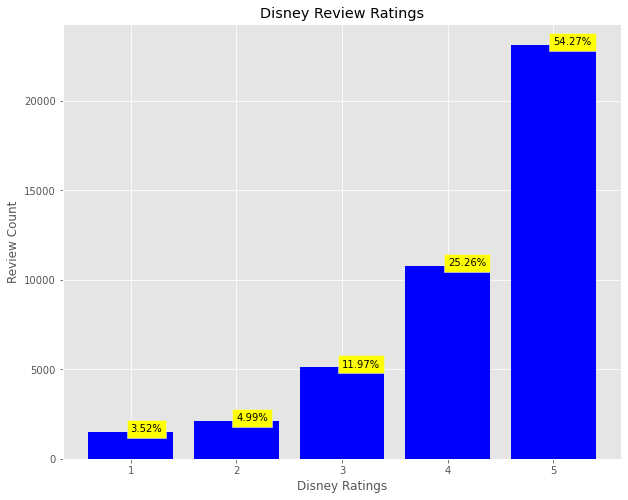

In [85]:
# I will use plt to create a data visualization that will 
# show the  Number of Reviews vs the ratings they fall within
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 8))
    plt.bar(rate_value.index, rate_value.values, color='blue')
    for rating, value in zip(rate_value.index, rate_value.values):
        plt.text(rating, value, str(round(value/sum(rate_value.values)*100, 2))+'%', 
                color='black', bbox=dict(facecolor='yellow'))
    plt.title('Disney Review Ratings')
    plt.xlabel('Disney Ratings')
    plt.ylabel('Review Count')
    plt.yticks(np.arange(0, 25000, 5000))

As seen above we see that are reviews scale range from 1 to 5 with 5 being the highest rating and 1 being the worst. In this graph we see that more than 50% of Disneys ratings are 5 star ratings while Disney has less than 10% ratings for both 1 and 2 star ratings. 

### Data Visualization 2: Seaborn cat bar plot  - Ratings by Year for Each Park Branch

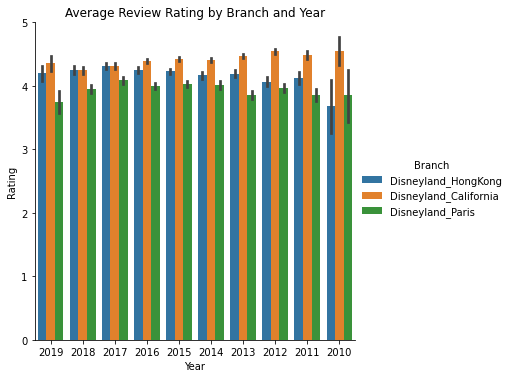

In [86]:
sns.catplot(data = Disney_Data, x = 'Year', y = 'Rating', hue = 'Branch', kind = "bar").set(title='Average Review Rating by Branch and Year')

The seaborn cat bar plot above shows that the average rating for each branch and or park is staying between three and four star average ratings. Which is great for the parks but as we do see that HongKongs parks has seen dips in 2010 but steadily rises throughout the years. While DisneyLand California maintained a average rating above 4 throughout the years.

### Data Visualization 3: Horizontal Bar Chart - Average Rating Based on Park Location

In [87]:
# First I will create a rating value for each park location
Park_rating = Disney_Data.groupby('Branch').agg({'Rating': 'mean'}).unstack()['Rating']

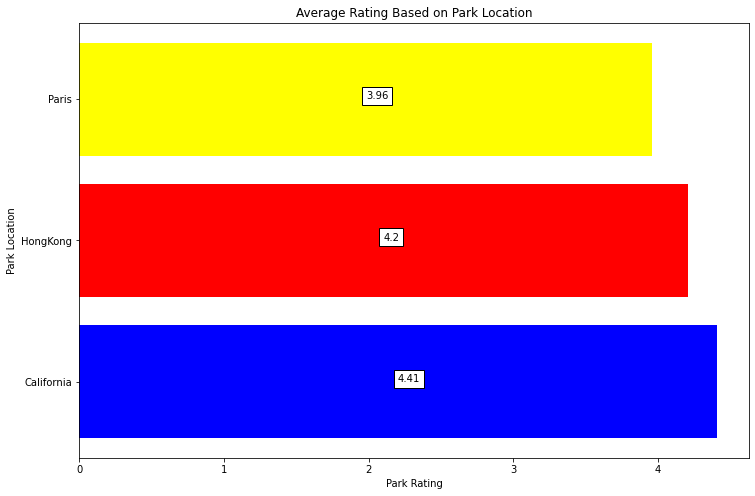

In [88]:
# I will now create a scatter plot that shows the average rate 
# for each park location through the use of plt and a for statement.
plt.figure(figsize=(12, 8))
plt.barh([branch[11:] for branch in Park_rating.index], 
         Park_rating.values, color=['blue', 'red', 'yellow'])
for value, park in zip(Park_rating.values, [branch[11:] for branch in Park_rating.index]):
    plt.text(value/2, park, round(value, 2), bbox=dict(facecolor='white'))
plt.xlabel('Park Rating')
plt.ylabel('Park Location')
plt.title('Average Rating Based on Park Location')
plt.xticks(np.arange(0, 5))
plt.show()

Seen above in the horizontal bar graph we see that Californa had the highest rating out of the three parks with a 4.41 and Paris in last with a average rating of 3.98 out of 5. These score can be jsutified as California is on of Disneys main parks so they tend to have better customer service and reviews due to the fact that the castmembers at that location are trained by individuals that have been with the company since it started. 

### Data Visualization 4: Seaborn Count Plot - Review Ratings Per Year

[Text(0.5, 1.0, 'Count Per Ratings Per Year')]

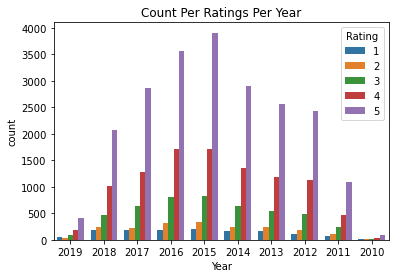

In [89]:
sns.countplot(data = Disney_Data, x = 'Year', hue = 'Rating').set(title='Count Per Ratings Per Year')

The seaborn countplot above shows that as the years go from 2010 / 2011 to 2015 we see a rise in reviews for the theme parks. But as we go on from 2015 to 2019 we see a decline in reviews. Which I found verey interesting as I believe Disney would still be receiving alot if not more reviews btu this could be due to incomplete data.

### Conclusion

The graphical analysis of this project has shown me that the overall percentage of reviews had 54.27% with five-star reviews and less than 10% with one- or two-star ratings. As this shows Disney for the most part is receiving positive feedback from their guests. But for the 10% that is not happy with their experience how is Disney dealing with this review rating and or do they even realize they have these low reviews? As in the “Ratings by Year for Each Park” cat bar plot we see that Disneyland Paris is the park that is receiving the lowest review ratings throughout the years. Which could be due to issues stemming from tat park alone that needs to be addressed by workers in the United States and or Disneyland California. While the average rating for Disneyland Paris is 3.98 while Hong Kong and California parks sit at a 4.22% and 4.41%. As this project continues we will dive deeper into the reviews given by guests and determine if the reviews reflect the ratings they received. 

## Term Project Milestone 2: Data Preparation

The data preparation process that is used for my Disney review data started by checking the data type of my variables and checking for missing values within my variables. Once my missing values are identified I will determine how to update these missing values. The missing values I had came from my Year_Month variable so I decide to split my data into two variables one that focused on the year and one on the month. Once this is done the original variable will be dropped and front fill “ffill” will be used to replace missing values. Next some extraction steps I will take to clean up my review’s variable are the removal of punctuation, lowercase, number removal, creating tokens, and the removal of stop words. While also engineering new useful features such as creating polarity for the reviews to determine if they are positive, negative, or neutral. As the use of sentiment intensity analysis allows vadar rating and polarity to be calculated on the review data. Last the use of dummies can be used to create new variables for the parks to show the different review ratings for each parks. 

### Drop any features that are not useful for your model building and explain why they are not useful.

In [90]:
# First I will pull up my data and view the current dataframe
Disney_Data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


In [91]:
# Next I will use info to see further information on each of my variables.
Disney_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42636 entries, 0 to 42655
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42636 non-null  int64 
 1   Rating             42636 non-null  int64 
 2   Year_Month         40023 non-null  object
 3   Reviewer_Location  42636 non-null  object
 4   Review_Text        42636 non-null  object
 5   Branch             42636 non-null  object
 6   Year               40023 non-null  object
 7   Month              40023 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.9+ MB


As seen above the data shows that the dtype for the review_ID and Rating variables are int64 and all the remaining variables are objects.

In [92]:
# Next I will check and what variables have NA values and what percentage of the variable is NA
Disney_Data.isnull().sum()/len(Disney_Data)

Review_ID            0.000000
Rating               0.000000
Year_Month           0.061286
Reviewer_Location    0.000000
Review_Text          0.000000
Branch               0.000000
Year                 0.061286
Month                0.061286
dtype: float64

As seen above we see that the Year_Month, Year, and Month variables are the only variables with NA's data and only being 6% of all the data. I will first drop the Year_Month variable due to the fact that I have created new variables for year and month but seperate. 

### Deal with missing data (do not just drop rows or columns without justifying this).

In [93]:
# I will first drop my Year_Month variable being that I seperated
# them and created new ones  
Disney_Data.drop(columns =["Year_Month"], inplace = True)
Disney_Data.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


In [94]:
# I will now use ffill to fill my missing data for month and year variables
# as the variables for the month and year would be similar to the one bellow 
Disney_Data = Disney_Data.fillna(method="ffill")

In [95]:
# Next I will check and make sure that all values are filled and are not missing any data
Disney_Data.isnull().sum()/len(Disney_Data)

Review_ID            0.0
Rating               0.0
Reviewer_Location    0.0
Review_Text          0.0
Branch               0.0
Year                 0.0
Month                0.0
dtype: float64

In [96]:
# Next I will use info to see further information on each of my variables.
Disney_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42636 entries, 0 to 42655
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42636 non-null  int64 
 1   Rating             42636 non-null  int64 
 2   Reviewer_Location  42636 non-null  object
 3   Review_Text        42636 non-null  object
 4   Branch             42636 non-null  object
 5   Year               42636 non-null  object
 6   Month              42636 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.6+ MB


As seen above the data frame no longer has any missing data and the Dtypes have been the same. 

### Perform any data extraction/selection steps and transform features if necessary.

In [97]:
# I will first remove the punctuation from my Review_Text variable 
# to start the cleaning process of my disney reviews
def punc_removal(text):
    text = " ".join([word.strip(string.punctuation) for word in text.split(" ")])
    return text
Disney_Data['Review_update'] = Disney_Data['Review_Text'].apply(punc_removal)

In [98]:
# Next I will transform my Review_update text to lowercase 
# through the use of lambda, apply, and lower
Disney_Data['Review_update']= Disney_Data['Review_update'].apply(lambda x: x.lower())

In [99]:
# Next I will remove the numbers that are imbedded in the reviews by using isdigit and apply
def number_removal(text):
    text = "".join([word for word in text if not any(c.isdigit() for c in word)])
    return text
Disney_Data['Review_update'] = Disney_Data['Review_update'].apply(number_removal)

In [100]:
# I will now convert my Review_update variable with split to create tokens 
def token(text):
    text = text.split()
    return text
Disney_Data['Review_update'] = Disney_Data['Review_update'].apply(token)

In [101]:
# Next I will set my stopwords to english and string my puncuation 
# While setting Disney as a word that I do not want edited by the stopwords
stop_words = set(stopwords.words('english'))
keep_names = ['disney']
punc = string.punctuation

In [102]:
# Next I will remove the stopwords from my Review_update
def stopword_removal(text): 
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop_words and x not in keep_names and x not in punc] 
    return text
Disney_Data['Review_update'] = Disney_Data['Review_update'].apply(stopword_removal)

In [103]:
# Last I will Join my Review_update variable values through the use of join
def review_join(text):
    text = " ".join(text)
    return text
Disney_Data['Review_update'] = Disney_Data['Review_update'].apply(review_join)

The data extraction that was completed above was for punctuation, lowercase, number removal, creating tokens, and the removal of stop words. Which will condence the review and make it easier to determine if the review is positive, negative, or neutral.

### Engineer new useful features.

In [104]:
# Next I will view my updated data frame to see my original and 
# new variable to further evaluate my dataframe
Disney_Data.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review_update
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,ever disneyland anywhere find disneyland hong ...
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit hk disneyland yet time s...
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland great compact park unfortunately...
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around hour kowlon kids lik...


In [105]:
# Next I create a new variable for polarity of my Rating variable
Disney_Data['Review_Polarity'] = Disney_Data['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3 else 'Negative'))
Disney_Data.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review_update,Review_Polarity
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,ever disneyland anywhere find disneyland hong ...,Positive
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit hk disneyland yet time s...,Positive
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...,Positive
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland great compact park unfortunately...,Positive
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around hour kowlon kids lik...,Positive


Above the use of lamba to determine the polarity of the rating for the reviews was determining if the value was Positive, Negative, or Neutral.

In [106]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [107]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [108]:
# Last I will calculat the vader by using the SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
vader = []

for i in Disney_Data['Review_update']:
    score = analyzer.polarity_scores(i)
    vader.append(score['compound'])
Disney_Data['Vader_rating'] = vader

In [109]:
# I will also determine the rating of each value by setting the vader to positive, negative, or neutral
Disney_Data['Vader_polarity'] = Disney_Data['Vader_rating'].apply(lambda x: 'Positive' if x > 0 else('Neutral' if x == 0 else 'Negative'))
Disney_Data.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review_update,Review_Polarity,Vader_rating,Vader_polarity
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,ever disneyland anywhere find disneyland hong ...,Positive,0.7889,Positive
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit hk disneyland yet time s...,Positive,0.9865,Positive
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...,Positive,0.9859,Positive
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland great compact park unfortunately...,Positive,0.8739,Positive
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around hour kowlon kids lik...,Positive,0.5106,Positive


The use of sentiment intensity analysis creates a Vader rating and polarity to give a more in-depth score rating and updating a finer scale for positive, negative, or neutral for the Vader polarity.

### Create dummy variables if necessary.

In [110]:
# I will be creating dummy variables for my Branch variable to see the dummy values for each park 
parks = pd.get_dummies(Disney_Data['Branch'])
Disney_Data = pd.concat([Disney_Data,parks],axis=1)
Disney_Data.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review_update,Review_Polarity,Vader_rating,Vader_polarity,Disneyland_California,Disneyland_HongKong,Disneyland_Paris
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,ever disneyland anywhere find disneyland hong ...,Positive,0.7889,Positive,0,1,0
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit hk disneyland yet time s...,Positive,0.9865,Positive,0,1,0
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...,Positive,0.9859,Positive,0,1,0
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland great compact park unfortunately...,Positive,0.8739,Positive,0,1,0
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around hour kowlon kids lik...,Positive,0.5106,Positive,0,1,0


As seen above we have created three new dummy variables for each park as we see Disneyland_California, Disneyland_HongKong, and Disneyland_Paris. I will use these dummy variables in milestone three when I build my model. 

### Conclusion

While the preparation of the Disney data revealed that the Year_Month variable had missing values which turned out to be only 6.12% of the values in the variable. It was decided to create two new variables one for year and one for month and dropping the Year_Month variable. Once the variable was deleted the two new variables Year and Month needed the missing values to be filled using “FFill” to bring the number of NAs to zero. Now that the variables are free of missing values the use of data extractions and selections to transform the review_text variable will be applied to clean and prep the reviews from Disney. These extractions consist of punctuation, lowercase, number removal, creating tokens, and the removal of stop words. Being that the Review variable is updated the Rating variable will now be used to show the polarity of the reviews depending on the rating of the review which is one through five. The polarity gives a score of positive, negative, or neutral to show a quick determination of where the review lies. Also, the use of sentiment intensity analysis creates a Vader rating and polarity to give a more in-depth score rating and updating a finer scale for positive, negative, or neutral for the Vader polarity. Last the  use of get_dummies was used to create dummy variables for the three parks to be used in the model.

## Term Project Milestone 3: Model Building and Evaluation

In [113]:
# First I will look at the column type for each variable
Disney_Data.dtypes

Review_ID                  int64
Rating                     int64
Reviewer_Location         object
Review_Text               object
Branch                    object
Year                      object
Month                     object
Review_update             object
Review_Polarity           object
Vader_rating             float64
Vader_polarity            object
Disneyland_California      uint8
Disneyland_HongKong        uint8
Disneyland_Paris           uint8
dtype: object

In [ ]:
# First I will split into training and test data:
x = Train_df_dummies['SalePrice'] 
y = Train_df_dummies['SaleCondition_Normal']
# Next I will split my data into a training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=0)